# video:https://www.youtube.com/watch?v=dkrXgzuZk3k&list=PL1H1sBF1VAKXCayO4KZqSmym2Z_sn6Pha

# course1:how to greate a new Image

In [29]:
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont
import matplotlib.pyplot as plt
from  matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline   
plt.rcParams['figure.figsize'] = (30.0, 15.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

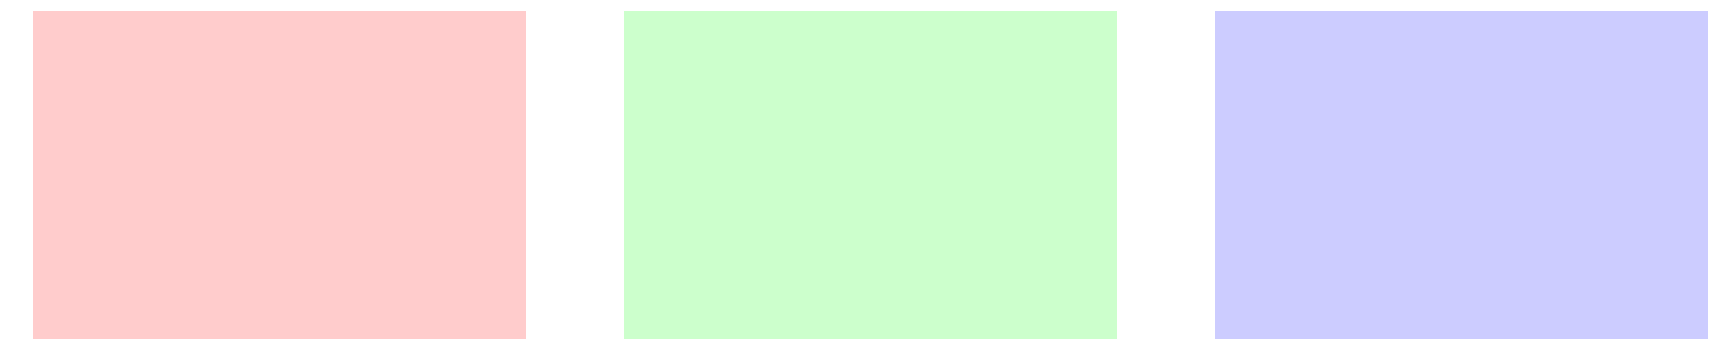

In [6]:
# image=Image.new(mode='L',size=(480,320))
# image=Image.new(mode='RGB',size=(480,320),color='rgb(0,128,0)')
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    image=Image.new(mode='RGB',size=(480,320),color='hsl('+str(i*120)+',100%,90%)')  #color,saturate,lightness
    plt.imshow(image)
    del image

# course2: how to open a new Image
# course3: how to blend 2 image

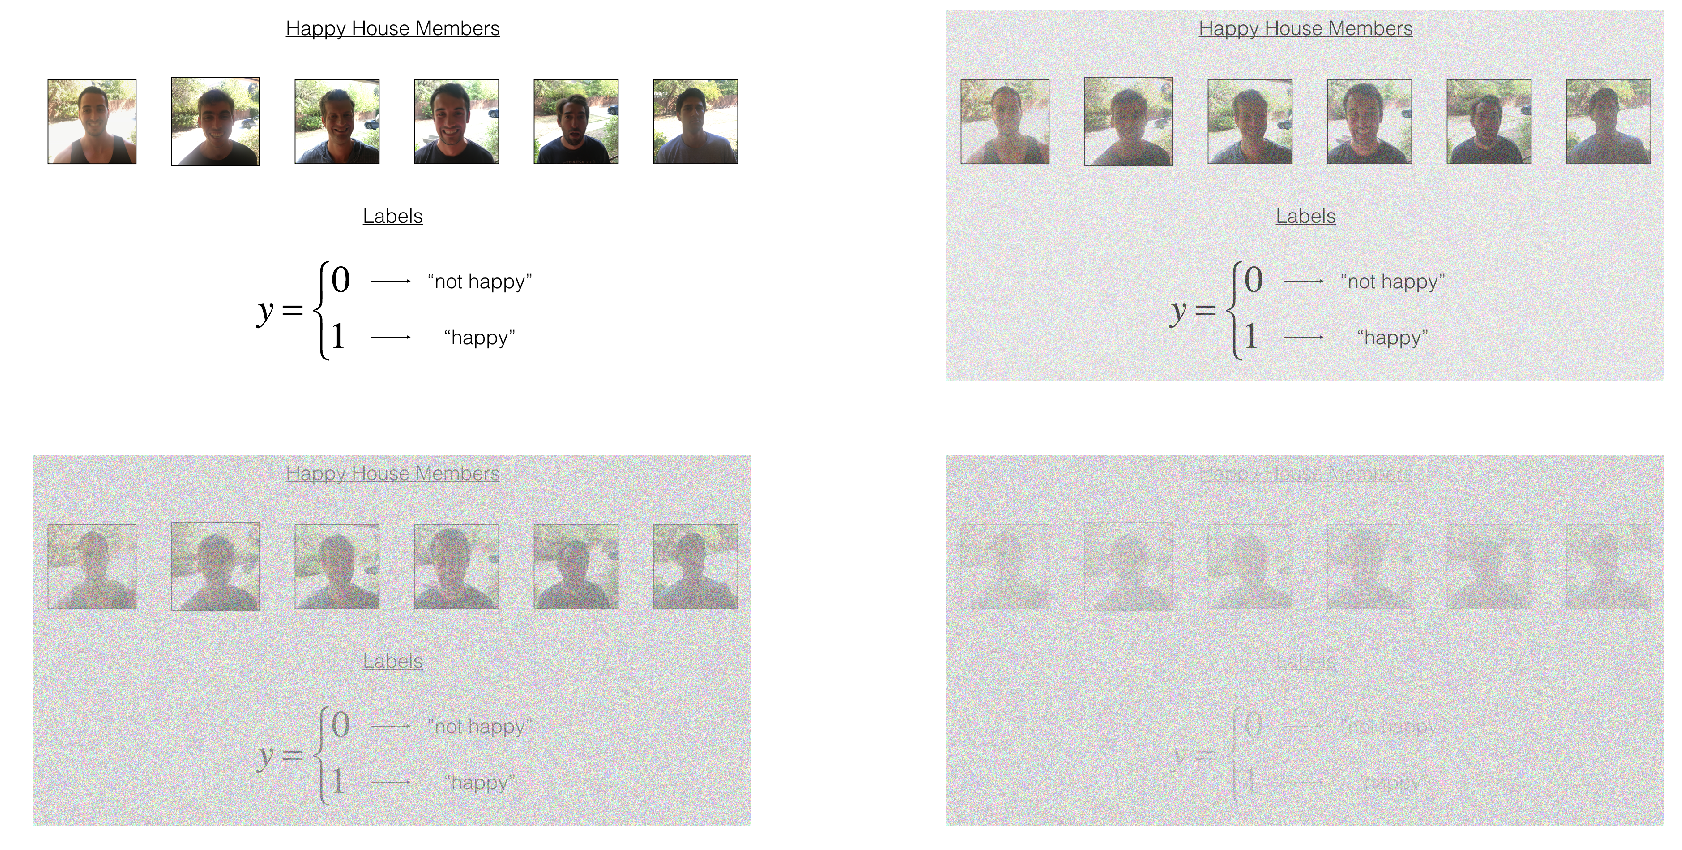

In [7]:
def _newImage(h,w,c=4):
    img=np.random.randn(h,w,c)
    img[:,:,3]=1
    img=np.uint8(img/np.max(img)*255)
    img=Image.fromarray(img)  #the way convert numpy to PIL.IMAGE,numpy have shape[h,w,c,alpha]
    return img


filename='images/house-members.png'
img1=Image.open(filename,mode='r')
# imshow(img1)
img2=_newImage(img1.size[1],img1.size[0])

for i in range(4):
    alpha=i/4
    plt.subplot(2,2,i+1)
    plt.axis('off')
    c=Image.blend(img1,img2,alpha)
    
    imshow(c)
del img1

## course4 tell your how to compisite 2 image using a mask
## course5 tell your how to convert format

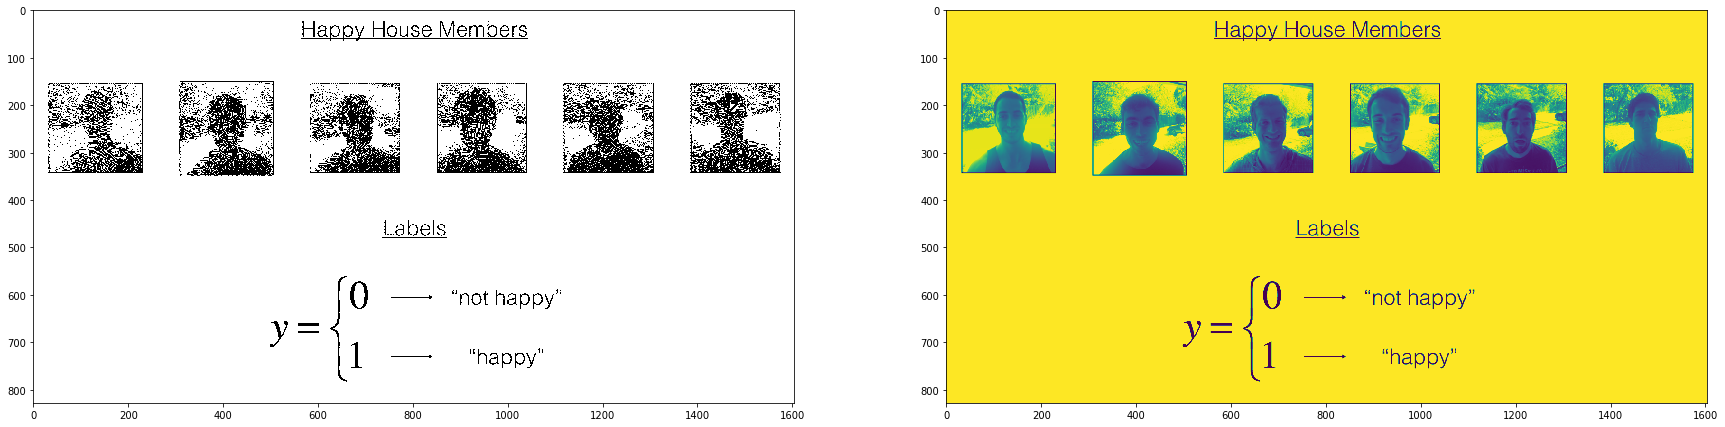

In [8]:
filename='images/house-members.png'
img1=Image.open(filename,mode='r')
mode=['1','L']
for i in range(len(mode)):
    plt.subplot(1,len(mode),i+1)
    plt.imshow(img1.convert(mode[i]))

In [9]:
def _mask(h,w,c=4):
    mask=np.zeros((h,w))
    H,W=h//2,w//2
    mask[0:H,0:W]=mask[H:,W:]=1
    mask=Image.fromarray(np.uint8(mask))
    return mask  #1 is white,0 is black

##  course 6 is infortant,crop the image

In [10]:
def _crop(image,percent=0.8,s=None):
    w,h=image.size
    if s==None:
        s=int(min(w,h)*percent)
    
    up_left=image.crop((0,0,s,s))
    up_right=image.crop((w-s,0,w,s))
    down_left=image.crop((0,h-s,s,h))
    down_right=image.crop((w-s,h-s,w,h))
    
    cx,cy=(w-s)//2,(h-s)//2
    center=image.crop((cx,cy,cx+s,cy+s))
    return up_left,up_right,down_left,down_right,center

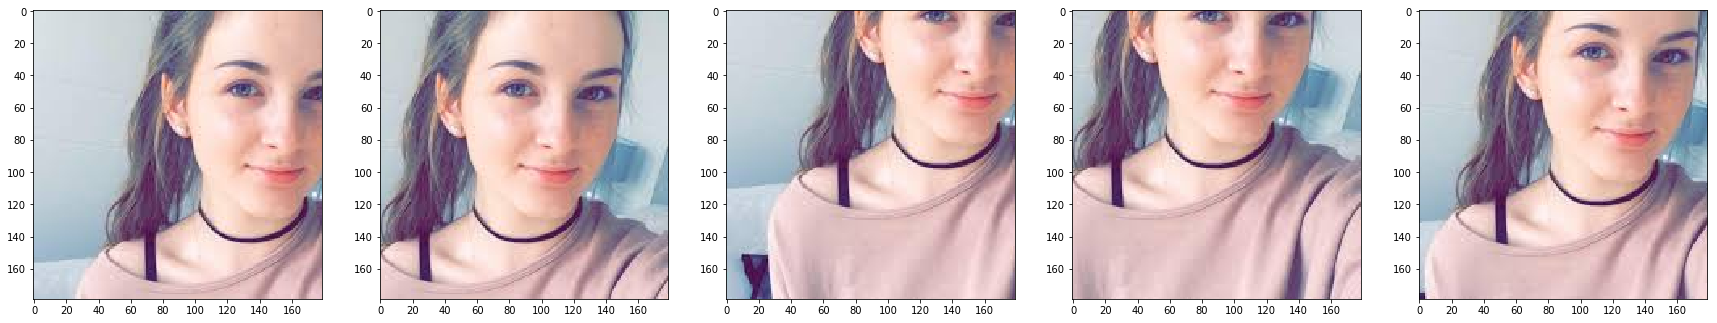

In [11]:
filename='images/gril.jpeg'
image=Image.open(filename)
croped_images=_crop(image)
for i in range(len(croped_images)):
    plt.subplot(1,len(croped_images),i+1)
    plt.imshow(croped_images[i])

## course 7 tell how to using filter

In [12]:
import PIL.ImageFilter as ImageFIlter

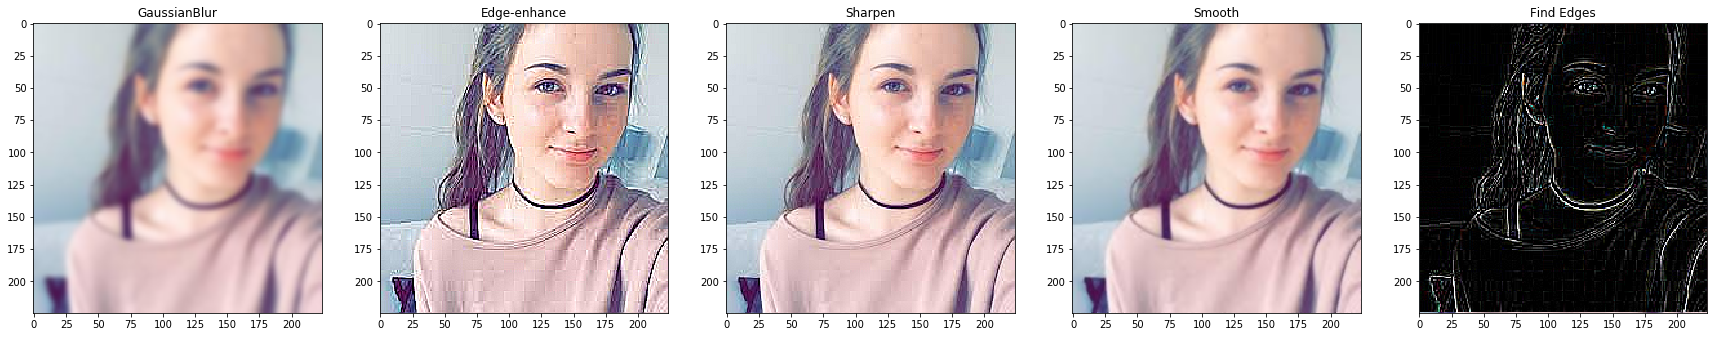

In [13]:
filters=[ImageFIlter.GaussianBlur,ImageFIlter.EDGE_ENHANCE,ImageFIlter.SHARPEN,ImageFIlter.SMOOTH,ImageFIlter.FIND_EDGES]
for i in range(len(filters)):
    plt.subplot(1,len(filters),i+1)
    plt.imshow(image.filter(filters[i]))
    plt.title(filters[i].name)

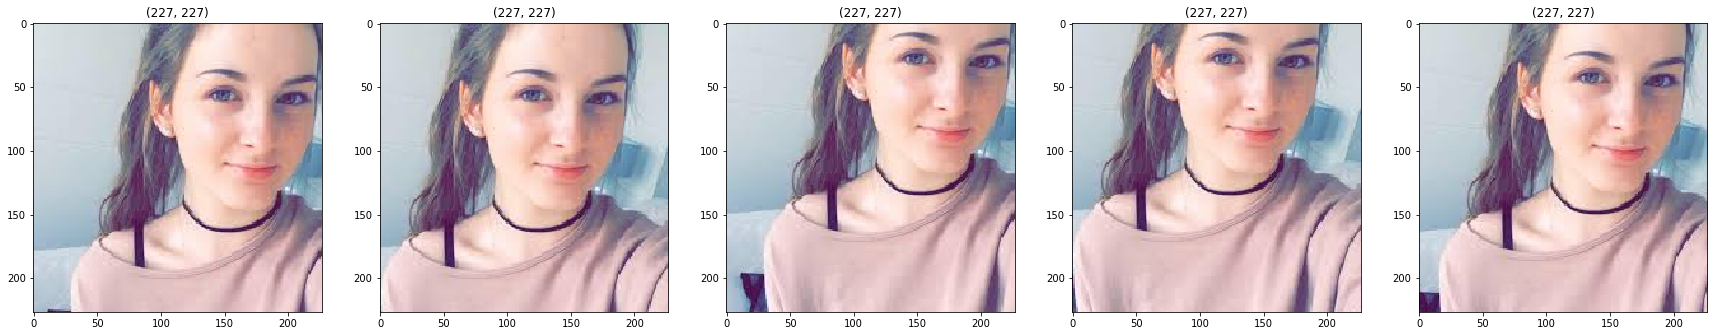

In [14]:
#for machine learning,image shape must unique
image=image.resize((256,256))
croped_images=_crop(image,s=227)
for i in range(len(croped_images)):
    plt.subplot(1,len(croped_images),i+1)
    plt.title(str(croped_images[i].size))
    plt.imshow(croped_images[i])

## course 11:getData

w:1604,h:828


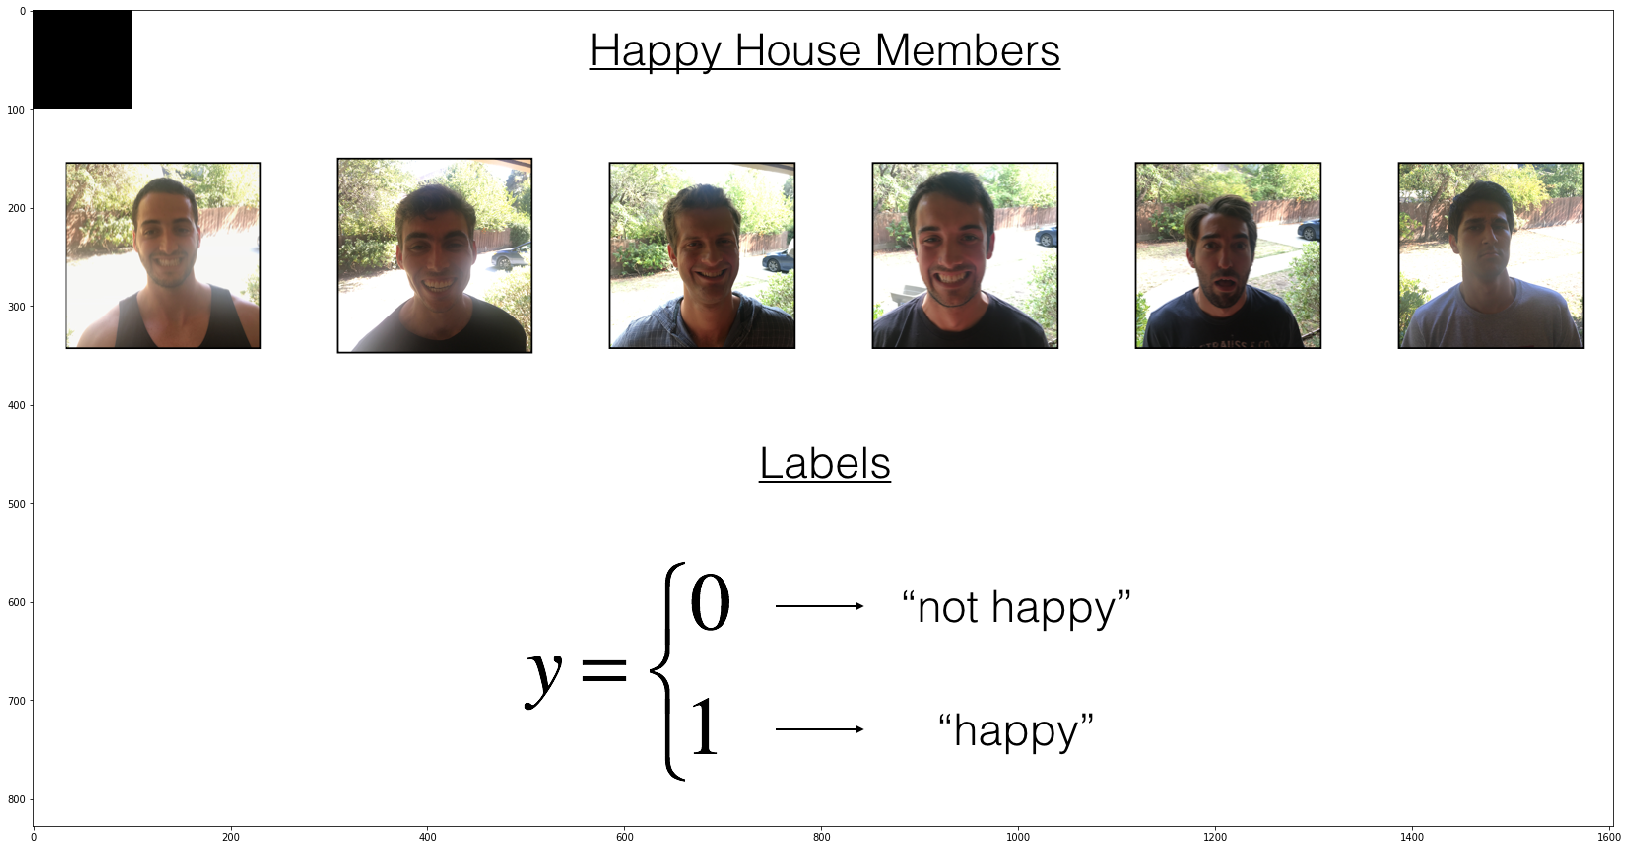

In [16]:
filename='images/house-members.png'
img1=Image.open(filename,mode='r')
print('w:%d,h:%d'%img1.size)
w,h=img1.size
'''
    getdata return a list[pt(0,0),pt(1,0),pt(2,0)...,pt(0,1)],mean first it store one row(width) then next row
'''
data=img1.getdata()
d=np.array(data).reshape((h,w,4))
d=d[:,:,0:3].astype(np.uint8)
d[0:100,0:100]=0
imshow(d)


uint8


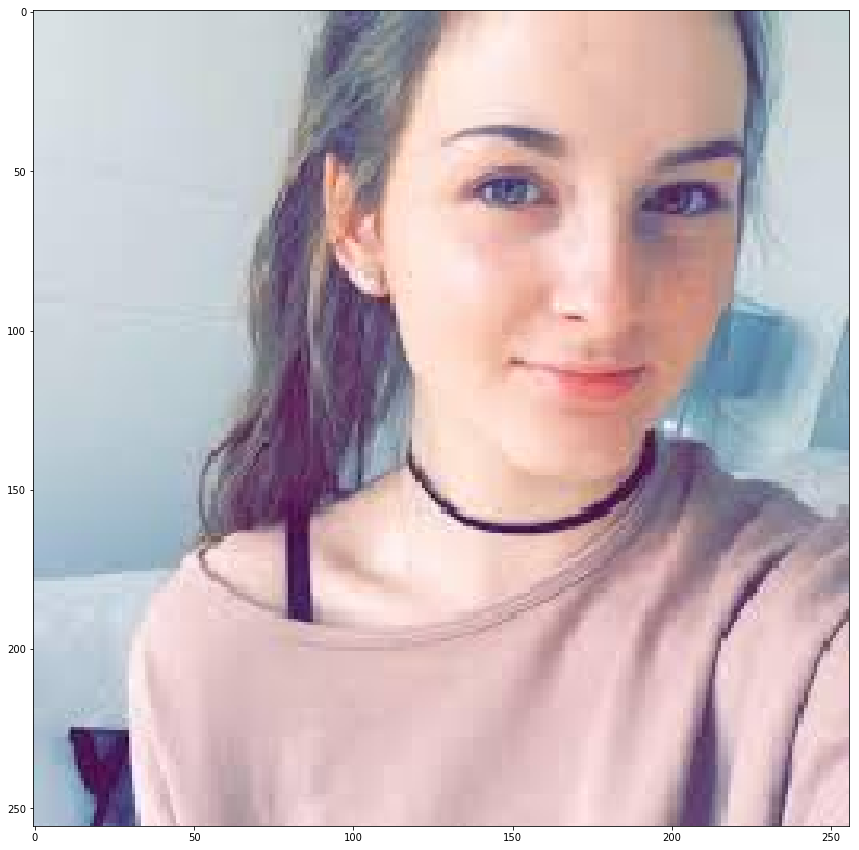

In [17]:
def PIL2Numpy(img):
    w,h=img.size
    c=len(image.getpixel((0,0)))
    '''
    getdata return a list[pt(0,0),pt(1,0),pt(2,0)...,pt(0,1)],mean first it store one row(width) then next row
'''
    
    return np.array(img.getdata()).reshape((h,w,c)).astype(np.uint8)
d=PIL2Numpy(image)
print(d.dtype)
imshow(d)

## course12 using paste

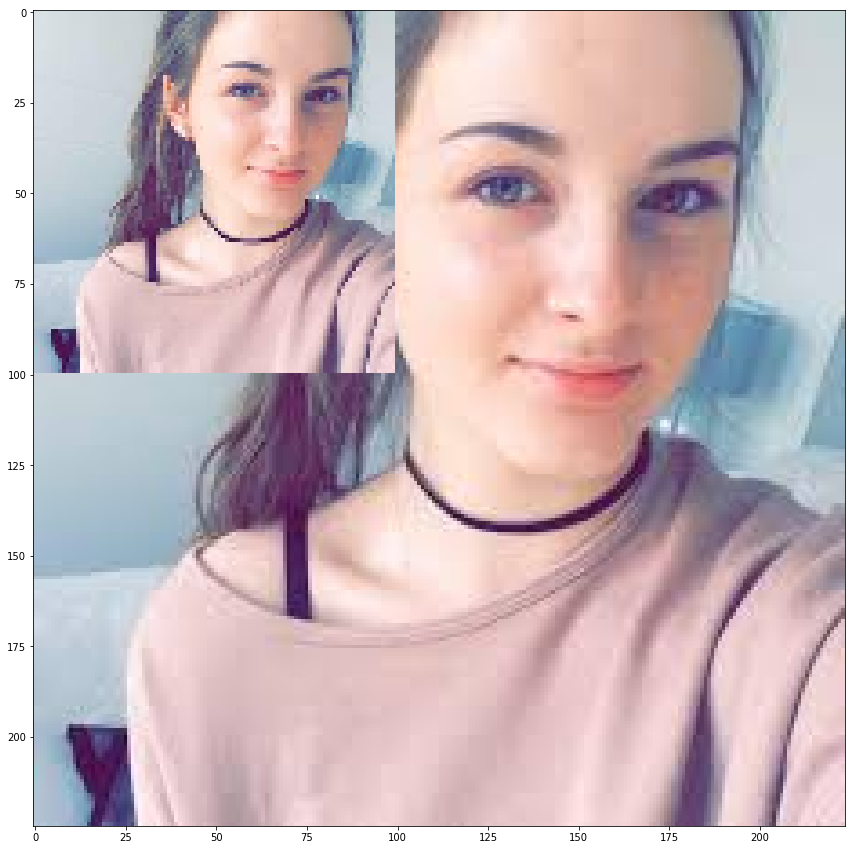

In [20]:
image=Image.open('images/gril.jpeg')
img2=image.resize((100,100))
image.paste(img2,box=(0,0,100,100))
imshow(image)

## then from course 15,you can rotate above picture

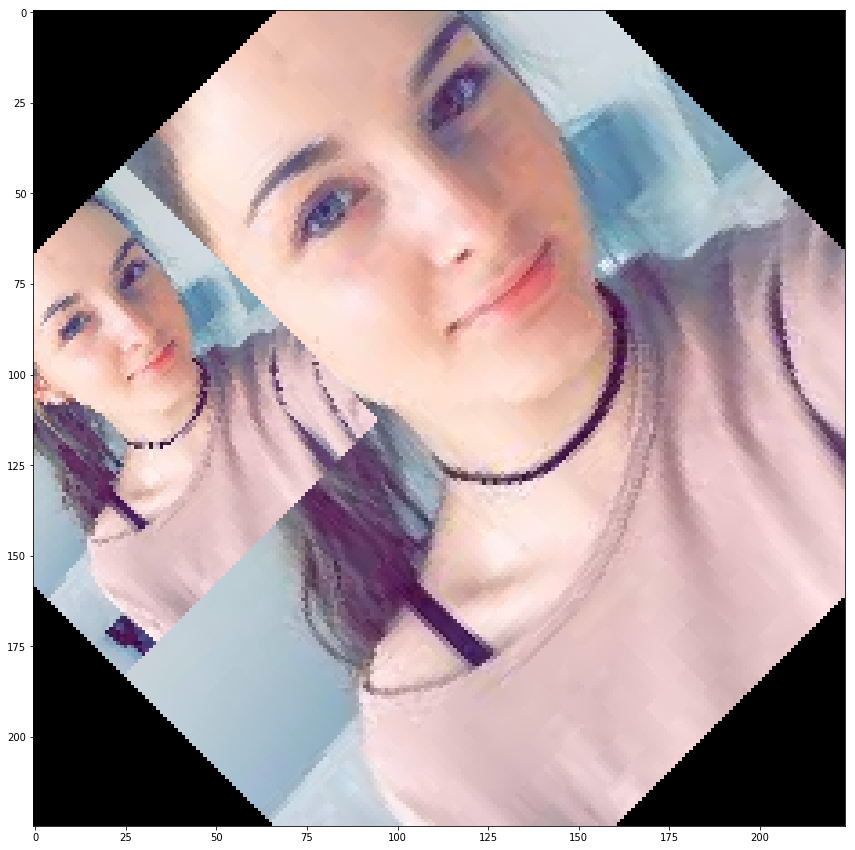

In [23]:
image_rotate45=image.rotate(45)
imshow(image_rotate45)
image_rotate45.save('images/rotate.jpg')

## Access Pixel using Access Object
https://www.youtube.com/watch?v=8jZCvE4Prj4


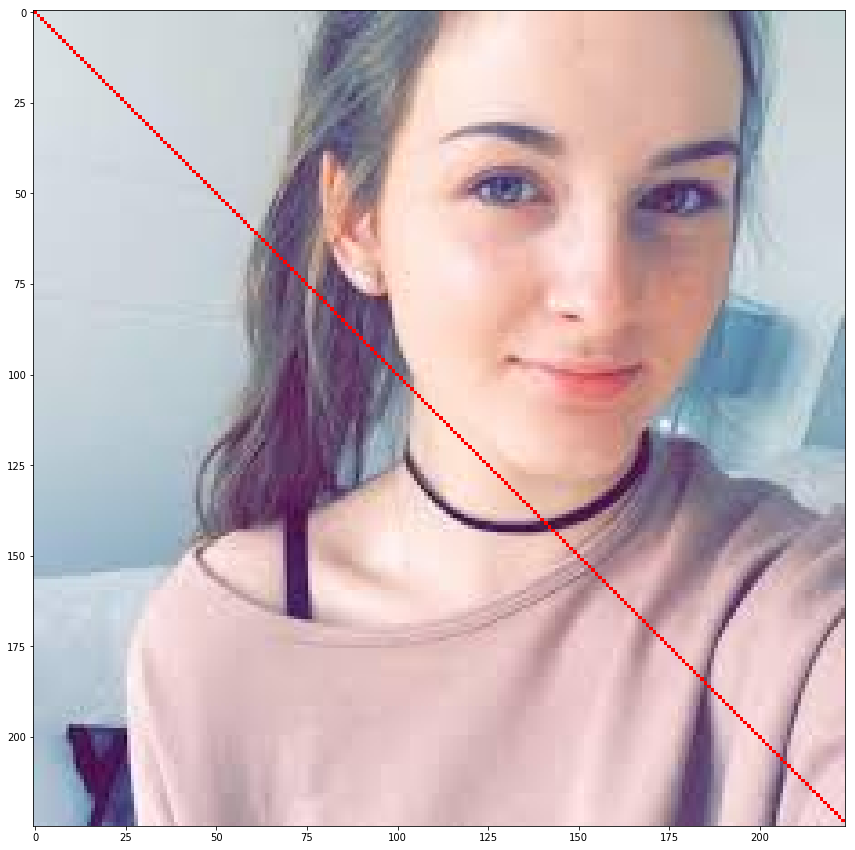

In [5]:
image=Image.open('images/gril.jpeg')
pixels=image.load()
print(pixels)
for i in range(image.width):
    pixels[i,i]=(255,0,0,255)
imshow(image)

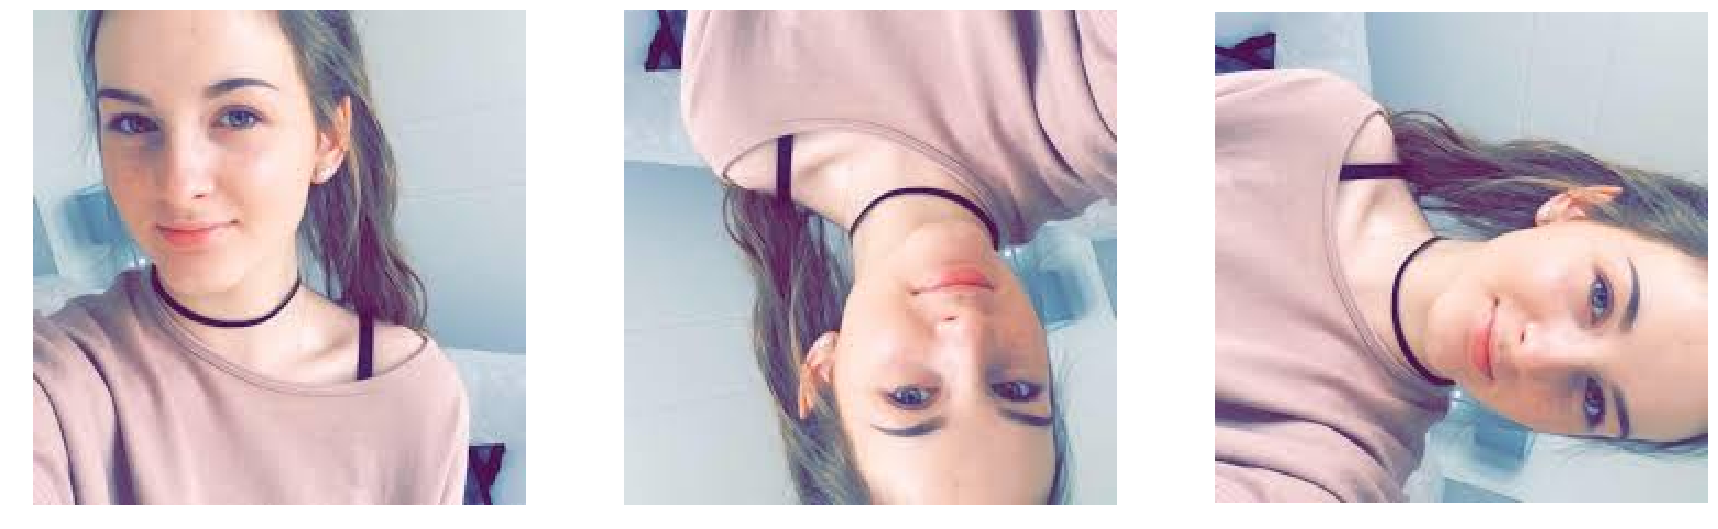

In [7]:
image=Image.open('images/gril.jpeg')
Trans=[Image.FLIP_LEFT_RIGHT,Image.FLIP_TOP_BOTTOM,Image.ROTATE_270]
for i in range(len(Trans)):
    plt.subplot(1,len(Trans),i+1)
    imshow(image.transpose(Trans[i]))
    plt.axis('off')

https://www.youtube.com/watch?v=piWKJpiC94o
## learn base Draw function
https://pillow.readthedocs.io/en/3.0.x/reference/ImageDraw.html

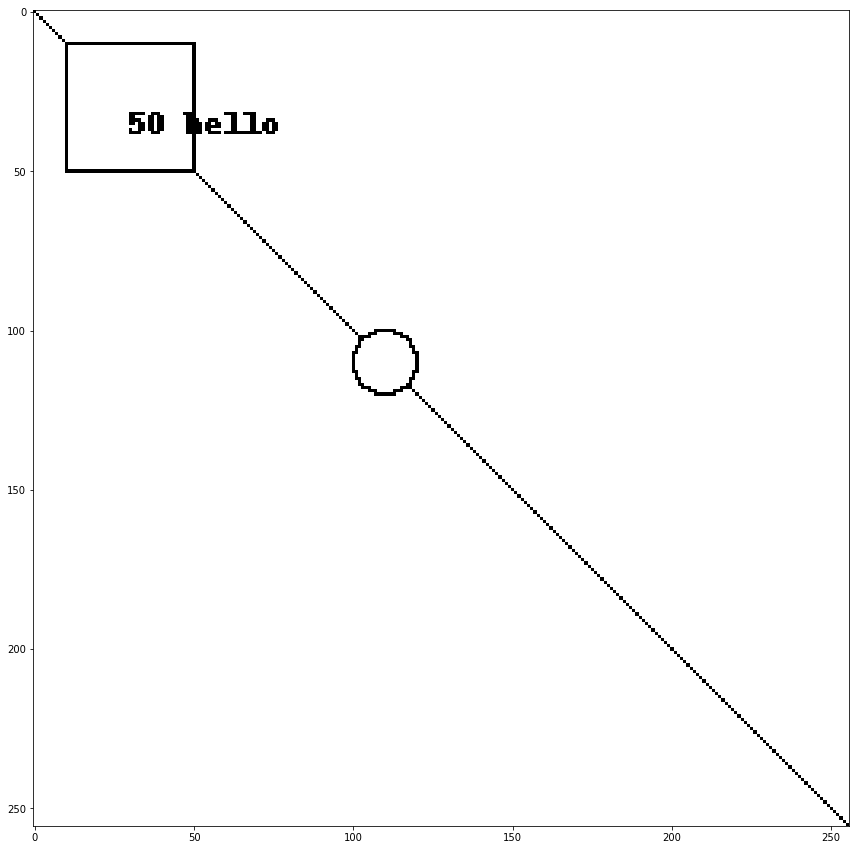

In [20]:
image=Image.new(mode='RGB',color='white',size=(256,256))
imdraw=ImageDraw.Draw(image)
imdraw.line([0,0,255,255],width=1,fill=(0,0,0))
imdraw.rectangle([10,10,50,50],outline=(0,0,0),fill='white')
imdraw.text((30,30),'50 hello',fill=(0,0,0))
imdraw.ellipse((100,100,120,120),fill='white',outline='black')

imshow(image)

## study some useness of ImageFont

In [32]:
font = ImageFont.truetype("/usr/share/fonts/truetype/openoffice/opens___.ttf")

ImportError: The _imagingft C module is not installed